# Import libraries and load data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split


# Data cleaning and formatting

In [4]:
#loading the data
insurance_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [5]:
#getting a sample of the train data
insurance_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
#getting a sample of the test data
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [7]:
#getting a statistical summary of the data
insurance_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [8]:
#getting data types and information on the data
insurance_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [9]:
#finding columns with null values
insurance_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [10]:
insurance_data['Building Dimension'].median()

1083.0

In [11]:
test_data['Building Dimension'].median()

900.0

In [12]:
insurance_data['Date_of_Occupancy'].median()

1970.0

In [13]:
test_data['Date_of_Occupancy'].median()

1968.0

In [14]:
#fill rows with null/missing values with their medians
insurance_data['Garden'] = insurance_data['Garden'].fillna(value = 0)
test_data['Garden'] = test_data['Garden'].fillna(value =0)
insurance_data['Building Dimension'] = insurance_data['Building Dimension'].fillna(value = 1083)
test_data['Building Dimension'] = test_data['Building Dimension'].fillna(value = 900)
insurance_data['Date_of_Occupancy'] = insurance_data['Date_of_Occupancy'].fillna(value = 1970)
test_data['Date_of_Occupancy'] = test_data['Date_of_Occupancy'].fillna(value = 1968)
insurance_data['Geo_Code'] = insurance_data['Geo_Code'].fillna(value = -1)
test_data['Geo_Code'] = test_data['Geo_Code'].fillna(value = -1)

In [15]:
#check if successful
insurance_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [16]:
#getting rows and columns
insurance_data.shape

(7160, 14)

In [17]:
#drop duplicates
insurance_data.drop_duplicates()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,1083.0,1,2001.0,.,-1,0
7156,H5926,2013,1.000000,0,V,V,V,U,1083.0,2,1980.0,.,-1,1
7157,H6204,2016,0.038251,0,V,V,V,U,1083.0,1,1992.0,.,-1,0
7158,H6537,2013,1.000000,0,V,V,V,U,1083.0,1,1972.0,.,-1,0


In [18]:
#change to numerical values
insurance_data.Building_Painted.replace(('N','V'),(1,0), inplace = True)
test_data.Building_Painted.replace(('N','V'),(1,0), inplace = True)
insurance_data.Building_Fenced.replace(('N','V'),(1,0), inplace = True)
test_data.Building_Fenced.replace(('N','V'),(1,0), inplace = True)
insurance_data.Garden.replace(('V','O'),(1,0), inplace = True)
test_data.Garden.replace(('V','O'),(1,0), inplace = True)
insurance_data.Settlement.replace(('U','R'),(1,0), inplace = True)
test_data.Settlement.replace(('U','R'),(1,0), inplace = True)


In [19]:
#confirm the changes
insurance_data.head()
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,0,1,0,0,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,0,1,0,0,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,0,0,1,1,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,0,1,0,0,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,0,1,0,0,1405.0,1,2004.0,3,3321


In [20]:
#preserve the reference to id column required for submission before dropping
#test_id = test_data['Customer Id']
insurance_data = insurance_data.drop('Customer Id', axis = 1)
#test_data = test_data.drop('Customer Id', axis = 1)


# EDA

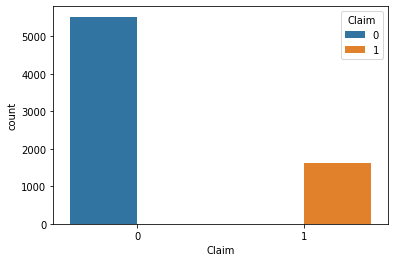

In [21]:
#count claims
sns.countplot(insurance_data['Claim'], hue = 'Claim', data = insurance_data)

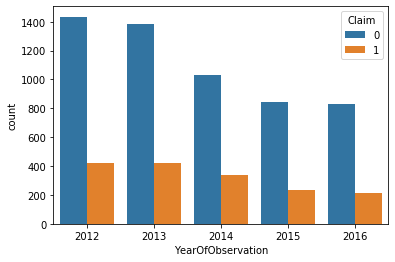

In [22]:
sns.countplot(insurance_data['YearOfObservation'], hue = 'Claim', data = insurance_data)

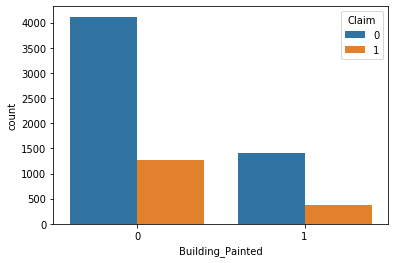

In [23]:
sns.countplot(insurance_data['Building_Painted'], hue = 'Claim', data = insurance_data)

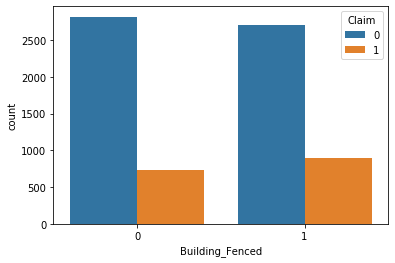

In [24]:
sns.countplot(insurance_data['Building_Fenced'], hue = 'Claim', data = insurance_data)

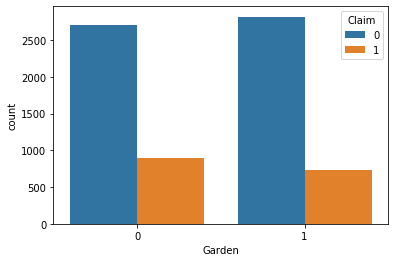

In [25]:
sns.countplot(insurance_data['Garden'], hue = 'Claim', data = insurance_data)

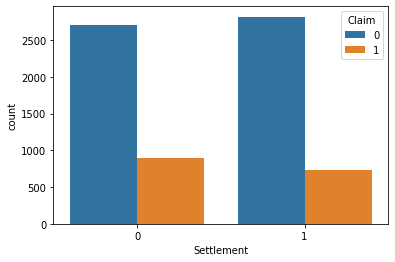

In [26]:
sns.countplot(insurance_data['Settlement'], hue = 'Claim', data = insurance_data)

# Data preprocessing and feature engineering

In [50]:
# Select the numeric columns
numeric_subset = insurance_data.select_dtypes('number')
numeric2_subset = test_data.select_dtypes('number')

# Select the categorical columns
categorical_subset = insurance_data[['NumberOfWindows','Geo_Code']]
categorical2_subset = test_data[['NumberOfWindows','Geo_Code']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)
categorical2_subset = pd.get_dummies(categorical2_subset)

# Join the two dataframes using concat
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features2 = pd.concat([numeric2_subset, categorical2_subset], axis = 1)

# Find correlations with the target 
correlations = features.corr()['Claim'].dropna().sort_values()


In [51]:
print(correlations.head(10))

NumberOfWindows_2      -0.064988
NumberOfWindows_3      -0.063584
Garden                 -0.052171
NumberOfWindows_   .   -0.052171
Settlement             -0.052019
NumberOfWindows_1      -0.033066
Geo_Code_19031         -0.031535
Geo_Code_51454         -0.031230
Building_Painted       -0.029857
Geo_Code_74173         -0.026528
Name: Claim, dtype: float64


In [52]:
print(correlations.tail(10))

NumberOfWindows_9       0.055776
NumberOfWindows_6       0.057861
Residential             0.063509
NumberOfWindows_>=10    0.068126
NumberOfWindows_8       0.075198
NumberOfWindows_7       0.082347
Insured_Period          0.088715
Building_Type           0.112168
Building Dimension      0.295558
Claim                   1.000000
Name: Claim, dtype: float64


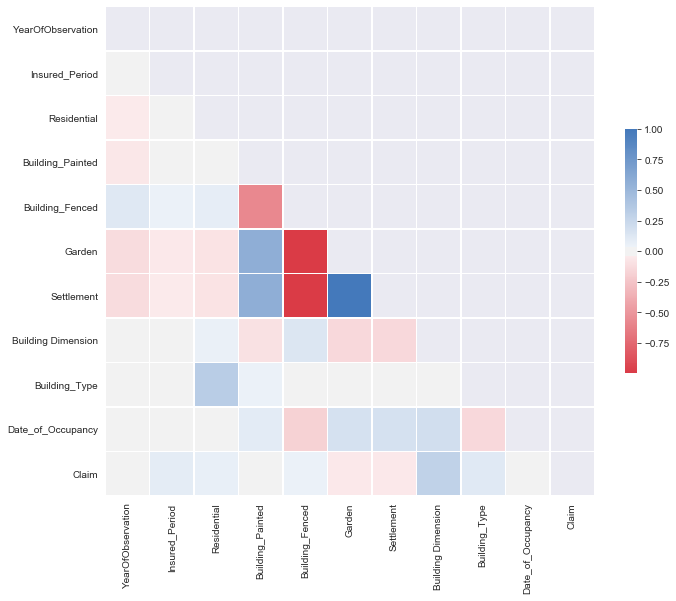

In [53]:
import seaborn as sns
# use the pandas .corr() function to compute pairwise correlations for the dataframe
corr = insurance_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'dark')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Validation

In [54]:
# more cleaning to get x and y labels
y = insurance_data.Claim
                   
#splitting data into 30% test and 70% train
X_train,X_test, y_train, y_test = train_test_split(features,y,test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(5012, 1330)
(2148, 1330)
(5012,)
(2148,)


# Machine learning

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [33]:
#finding the mae
def mae(y_true, y_pred):
  return np.mean(abs(y_true - y_pred))


In [55]:
#Training, testing and evaluating the model
def train_test_evaluate(model):
    
    #Train
    model.fit(X_train,y_train)
    
    #Test
    model_pred = model.predict(X_test)
    
    #Evaluate
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [76]:
#Run ML algorithms

#KNearest Neighbors
knn = KNeighborsRegressor(n_neighbors = 10)
knn_mae = train_test_evaluate(knn)
print('K Nearest Neighbors Mean Absolute Error: %0.4f' %knn_mae)


#svm
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = train_test_evaluate(svm)
print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

#Gradient Boosted Machines
gradient_boosted = GradientBoostingRegressor(random_state = 60)
gradient_boosted_mae = train_test_evaluate(gradient_boosted)

print('Gradient Boosted Regression Mean Absolute Error: %0.4f' %gradient_boosted_mae, '\n')


K Nearest Neighbors Mean Absolute Error: 0.3152
Support Vector Machine Regression Performance on the test set: MAE = 0.3436
Gradient Boosted Regression Mean Absolute Error: 0.0002 



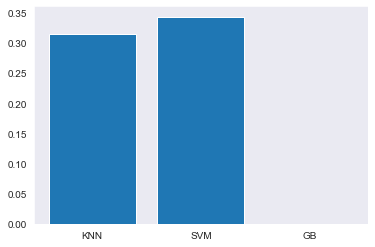

In [77]:
#plot the algorithm maes
X = ['KNN','SVM','GB']
Y = [knn_mae,svm_mae,gradient_boosted_mae]

plt.bar(X,Y)
plt.show()

In [78]:
#find accuracy and calidation scores with different learning rates using GB
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(features, y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(features, y)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.772
Accuracy score (validation): 0.771

Learning rate:  0.1
Accuracy score (training): 0.772
Accuracy score (validation): 0.771

Learning rate:  0.25
Accuracy score (training): 0.772
Accuracy score (validation): 0.771

Learning rate:  0.5
Accuracy score (training): 0.774
Accuracy score (validation): 0.774

Learning rate:  0.75
Accuracy score (training): 0.774
Accuracy score (validation): 0.775

Learning rate:  1
Accuracy score (training): 0.774
Accuracy score (validation): 0.777



In [79]:
#predicting the claim
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
#predictions.shape

In [80]:
#converting to the submissions format
submission_format = pd.read_csv('sample_submission.csv', index_col=0)
my_submission = pd.DataFrame(data= {'Customer Id': test_data['Customer Id'], 'Claim': np.mean(predictions)})


In [81]:
#confirming the results
my_submission.head()


,Customer Id,Claim
0,H11920,0.006518
1,H11921,0.006518
2,H9805,0.006518
3,H7493,0.006518
4,H7494,0.006518


In [82]:
#converting file for submission
my_submission.to_csv('sub.csv', index = False)